[[ 0.       0.       1.     ]
 [-3.70962 -5.3521   1.     ]
 [-1.42211 -2.40219  1.     ]
 [-2.66972  4.30397  1.     ]
 [ 1.55548  4.9359   1.     ]
 [-1.59524  6.23187  1.     ]
 [-5.55343 -1.67754  1.     ]
 [-5.57887 -0.37315  1.     ]
 [ 2.91409  4.75527  1.     ]
 [-1.92258 -5.99233  1.     ]
 [ 4.57485  4.59031  1.     ]
 [ 5.32024 -0.0782   1.     ]
 [ 1.98235 -1.70504  1.     ]
 [-1.67116  2.00863  1.     ]
 [ 2.39138  0.11597  1.     ]
 [-0.03928 -2.43152  1.     ]
 [ 1.29275 -1.86318  1.     ]
 [ 0.01739  0.86042  1.     ]
 [-0.14444 -4.24898  1.     ]
 [ 6.38276  1.80984  1.     ]
 [ 2.33197 -4.20321  1.     ]
 [-6.6919   1.80744  1.     ]
 [-2.67265 -0.99825  1.     ]
 [-5.1902  -2.51251  1.     ]
 [ 5.7403  -0.70631  1.     ]
 [ 2.73013 -3.54386  1.     ]
 [-4.75332  2.13464  1.     ]
 [ 2.0199   0.78374  1.     ]
 [ 2.07486  4.42268  1.     ]
 [-5.04006  1.98926  1.     ]
 [-1.5867  -3.00892  1.     ]
 [ 0.25811  6.21287  1.     ]
 [ 3.82225  0.48971  1.     ]
 [ 3.46025

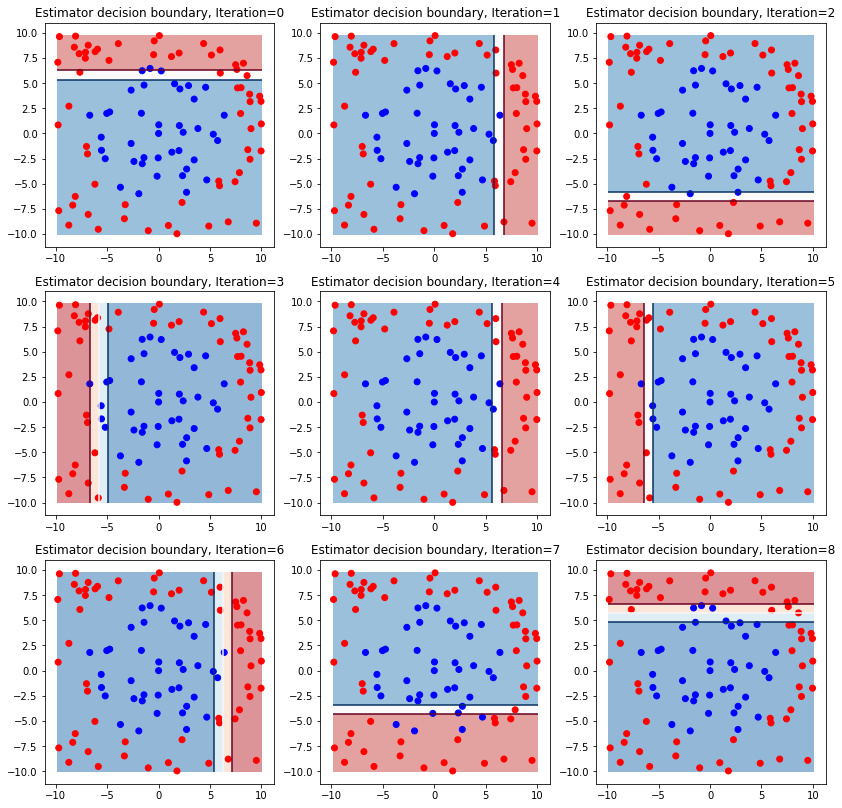

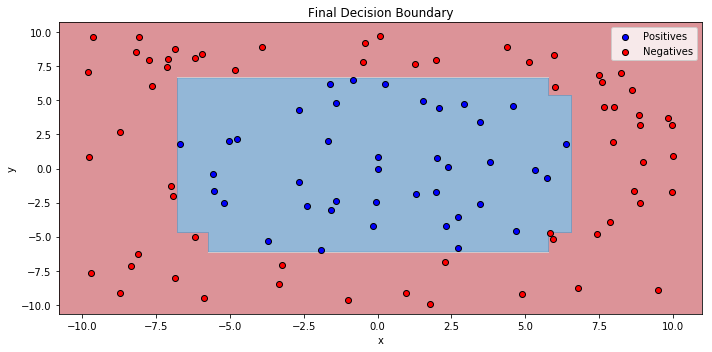

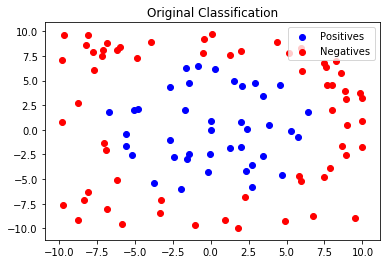

No handles with labels found to put in legend.


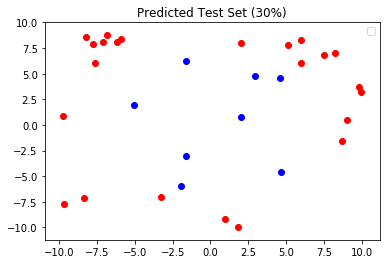

Accuracy: 1.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import train_test_split 
from sklearn import metrics


estimator_list=[]*10
# Construct dataset
data= np.genfromtxt('dataCircle.txt')
# print(data)
pos=data[data[:,2] ==1]
neg=data[data[:,2] ==-1]

X = data[:,0:2]

y = data[:,2]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Create and fit an AdaBoosted decision tree
adaModel = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME.R",
                         n_estimators=9, learning_rate=1.0)
model=adaModel.fit(X, y)
y_pred= model.predict(x_test)

# Plot each weak classifier
def plot_decision_boundary(classifier, X, y, N = 9, ax = None ):
    '''Utility function to plot decision boundary and scatter plot of data'''
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid( np.linspace(x_min, x_max, N), np.linspace(y_min, y_max, N))
    #Check what methods are available
    if hasattr(classifier, "decision_function"):
        zz = np.array( [classifier.decision_function(np.array([xi,yi]).reshape(1,-1)) for  xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] )
    elif hasattr(classifier, "predict_proba"):
        zz = np.array( [classifier.predict_proba(np.array([xi,yi]).reshape(1,-1))[:,1] for  xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] )
    else :
        zz = np.array( [classifier(np.array([xi,yi]).reshape(1,-1)) for  xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] )
            
    # reshape result and plot
    Z = zz.reshape(xx.shape)
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    #Get current axis and plot
    if ax is None:
        ax = plt.gca()
    ax.contourf(xx, yy, Z, 2, cmap='RdBu', alpha=.5)
    ax.contour(xx, yy, Z,  2, cmap='RdBu')
    ax.scatter(X[:,0],X[:,1], c = y, cmap = cm_bright)

fig = plt.figure(figsize=(14,14))
for i in range(0,9):
    fig.add_subplot(3,3,i+1)
    plot_decision_boundary(model.estimators_[i],X,y)
    plt.title('Estimator decision boundary, Iteration={}'.format(i))
plt.savefig('weak_classifiers.png', bbox_inches='tight')
plt.show()
    
# Plot all decision boundaries
plot_step = 0.02
plt.figure(figsize=(10, 5))
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, 2, cmap='RdBu', alpha=0.5)
plt.axis("tight")


# Plot the training points
plt.scatter(pos[:,0], pos[:,1], color='blue',cmap=plt.cm.Paired, edgecolor='k', label='Positives')
plt.scatter(neg[:,0], neg[:,1], color='red',cmap=plt.cm.Paired, edgecolor='k', label='Negatives')
    
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Final Decision Boundary')
plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.savefig('final_decision_boundary.png', bbox_inches='tight')
plt.show()

plt.scatter(pos[:,0], pos[:,1], color='blue', label='Positives')
plt.scatter(neg[:,0], neg[:,1], color='red', label='Negatives')
plt.legend(loc='upper right')
plt.title('Original Classification')
plt.savefig('original_classification.png', bbox_inches='tight')
plt.show()

for idx,i in enumerate(y_pred):
    if y_pred[idx]==1:
        plt.scatter(x_test[idx,0],x_test[idx,1], color='blue')
    else:
        plt.scatter(x_test[idx,0],x_test[idx,1], color='red')
plt.legend(loc='upper right')
plt.title('Predicted Test Set (30%)')  
plt.savefig('test_classification.png', bbox_inches='tight')
plt.show()

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))